# Loading data

NOTE: must have WDICSV.csv somewhere, feel free to make your own paths to the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
cd drive/MyDrive/CompSci526/Project

/content/drive/MyDrive/CompSci526/Project


## Data cleaning and Exploratory analysis

In [ ]:
# Simen load
df = pd.read_csv('WDICSV.csv')

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.401410,17.911234,18.463874,18.924037,19.437054,20.026254,20.647969,21.165877,21.863139,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.728819,7.005877,7.308571,7.547226,7.875917,8.243018,8.545483,8.906711,9.261320,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.080931,38.422282,38.722108,38.993157,39.337872,39.695279,40.137847,40.522209,41.011132,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.860474,33.903800,38.854624,40.199898,43.017148,44.381259,46.264875,48.100862,48.711995,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.619475,16.500171,24.605861,25.396929,27.037528,29.137914,31.001049,32.777910,33.747907,NaN


In [ ]:
first_country_index = np.where(np.array(df["Country Name"]) == "Afghanistan")[0][0]
df_countries = df.iloc[first_country_index:,:]
df_areas = df.iloc[:first_country_index,:]

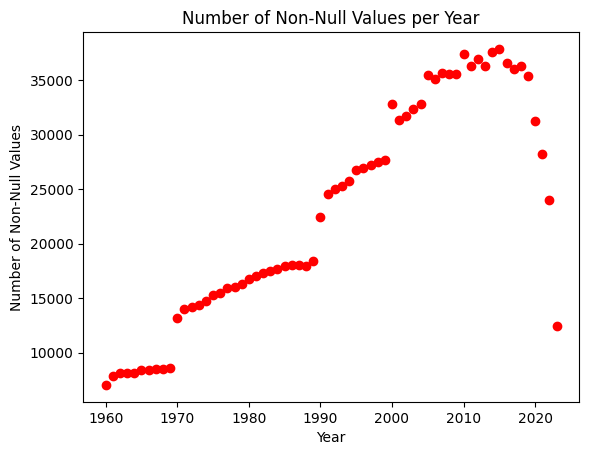

In [ ]:
years = range(1960,2024)
num_non_nulls = []

for year in years:
  num_non_nulls.append(len(df_areas) - df_areas[str(year)].isnull().sum())

num_non_nulls = np.array(num_non_nulls)
year = np.array(years)

plt.plot(year, num_non_nulls, 'ro')
plt.xlabel('Year')
plt.ylabel('Number of Non-Null Values')
plt.title('Number of Non-Null Values per Year')
plt.show()

In [ ]:
indicators_unique = np.array(df["Indicator Code"].unique())
countries_unique = np.array(df["Country Name"].unique())
country_codes_unique = np.array(df["Country Code"].unique())
indicator_names_unique = np.array(df["Indicator Name"].unique())

In [ ]:
countries = df_countries["Country Name"].unique()
areas = df_areas["Country Name"].unique()

country_codes = df_countries["Country Code"].unique()
area_codes = df_areas["Country Code"].unique()

In [ ]:
countries[:5]

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra'],
      dtype=object)

In [ ]:
# Indicator code: NY.GDP.PCAP.CD
# Indicator Name: GDP per capita (current US$)

In [ ]:
# Indicator code: NY.GDP.MKTP.KD.ZG
# Indicator Name: "GDP growth (annual %)"
# df_countries[df_countries["Indicator Code"] == "NY.GDP.MKTP.KD.ZG"]

In [ ]:
# see all the unique indicators
# for i, ind in enumerate(indicator_names_unique):
#   print(indicators_unique[i], "         ",ind)

In [ ]:
# check number of non_null values per country
df[df["Country Name"] == "United States"].isnull().sum()
# checking null values from 1990s until 2022
df[df["Country Name"] == "United States"].iloc[:,34:-1].notnull().sum().head()

,0
1990,654
1991,700
1992,666
1993,688
1994,714


In [ ]:
# create a dictionary with key of indicator_names_unique and value of a dataframe with only that indicator for countries

indicator_dict = {}
for indicator_name in indicator_names_unique:
  indicator_dict[indicator_name] = df_countries[df_countries["Indicator Name"] == indicator_name]

# Should we choose specific countries to work with? Or should we look at all countries and try to infer something

In [ ]:
df_indicator_names = pd.read_csv('WDISeries.csv')
code_map = pd.Series(df_indicator_names['Indicator Name'].values,index=df_indicator_names['Series Code']).to_dict()

years = [str(i) for i in range(1970, 2022)]

# add column for each row representing the percent of years where the value is not NaN in that column
df['percent_not_nan'] = df[years].notna().mean(axis=1)

# average along row values where indicator code matches to get percent of the data for that code that is not NaN
coverage = df.groupby('Indicator Code')['percent_not_nan'].mean()
coverage = coverage.sort_values(ascending=False)

PAGE = 1
print('\033[1mCoverage   Title\033[0m')
for i in range(50 * (PAGE - 1), 50 * PAGE):
  print(f'{100*coverage.iloc[i]:.2f}%    ', code_map.get(coverage.index[i], 'unknown'), f'({coverage.index[i]})')

Coverage   Title
99.62%     Population ages 00-04, female (% of female population) (SP.POP.0004.FE.5Y)
99.62%     Population ages 45-49, male (% of male population) (SP.POP.4549.MA.5Y)
99.62%     Population, male (% of total population) (SP.POP.TOTL.MA.ZS)
99.62%     Survival to age 65, female (% of cohort) (SP.DYN.TO65.FE.ZS)
99.62%     Population ages 20-24, male (% of male population) (SP.POP.2024.MA.5Y)
99.62%     Population ages 25-29, female (% of female population) (SP.POP.2529.FE.5Y)
99.62%     Population ages 70-74, female (% of female population) (SP.POP.7074.FE.5Y)
99.62%     Population ages 30-34, female (% of female population) (SP.POP.3034.FE.5Y)
99.62%     Population ages 30-34, male (% of male population) (SP.POP.3034.MA.5Y)
99.62%     Population ages 35-39, female (% of female population) (SP.POP.3539.FE.5Y)
99.62%     Population, female (% of total population) (SP.POP.TOTL.FE.ZS)
99.62%     Population ages 35-39, male (% of male population) (SP.POP.3539.MA.5Y)
99.62% 

In [ ]:
# Print all rows with coverage above 60% and their corresponding titles
print('\033[1mCoverage   Title\033[0m')  # Bold header

# Loop through all entries in coverage
for i in range(len(coverage)):
    coverage_value = 100 * coverage.iloc[i]  # Get the coverage percentage

    # Only print if coverage is greater than 60%
    if coverage_value > 60:
        indicator_code = coverage.index[i]  # Get the indicator code
        indicator_name = code_map.get(indicator_code, 'unknown')  # Get the name from the map

        # Print each line in the format: coverage % and the corresponding indicator name
        print(f'{coverage_value:.2f}%    {indicator_name} ({indicator_code})')


Coverage   Title
99.62%    Population ages 00-04, female (% of female population) (SP.POP.0004.FE.5Y)
99.62%    Population ages 45-49, male (% of male population) (SP.POP.4549.MA.5Y)
99.62%    Population, male (% of total population) (SP.POP.TOTL.MA.ZS)
99.62%    Survival to age 65, female (% of cohort) (SP.DYN.TO65.FE.ZS)
99.62%    Population ages 20-24, male (% of male population) (SP.POP.2024.MA.5Y)
99.62%    Population ages 25-29, female (% of female population) (SP.POP.2529.FE.5Y)
99.62%    Population ages 70-74, female (% of female population) (SP.POP.7074.FE.5Y)
99.62%    Population ages 30-34, female (% of female population) (SP.POP.3034.FE.5Y)
99.62%    Population ages 30-34, male (% of male population) (SP.POP.3034.MA.5Y)
99.62%    Population ages 35-39, female (% of female population) (SP.POP.3539.FE.5Y)
99.62%    Population, female (% of total population) (SP.POP.TOTL.FE.ZS)
99.62%    Population ages 35-39, male (% of male population) (SP.POP.3539.MA.5Y)
99.62%    Populatio

In [ ]:
pairs = [(f'{100*coverage.iloc[i]:.2f}%    ', code_map.get(coverage.index[i], 'unknown'), f'({coverage.index[i]})') for i in range(len(coverage))]
for i in filter(lambda x: 'Education' in x[1] or 'School' in x[1], pairs):
  print(*i)

77.50%     School enrollment, primary (% gross) (SE.PRM.ENRR)
73.55%     School enrollment, primary, female (% gross) (SE.PRM.ENRR.FE)
73.55%     School enrollment, primary, male (% gross) (SE.PRM.ENRR.MA)
71.49%     School enrollment, primary (gross), gender parity index (GPI) (SE.ENR.PRIM.FM.ZS)
67.99%     School enrollment, secondary (% gross) (SE.SEC.ENRR)
62.85%     School enrollment, secondary, female (% gross) (SE.SEC.ENRR.FE)
62.85%     School enrollment, secondary, male (% gross) (SE.SEC.ENRR.MA)
61.99%     School enrollment, tertiary (% gross) (SE.TER.ENRR)
61.17%     School enrollment, preprimary (% gross) (SE.PRE.ENRR)
60.81%     School enrollment, secondary (gross), gender parity index (GPI) (SE.ENR.SECO.FM.ZS)
59.76%     School enrollment, primary, private (% of total primary) (SE.PRM.PRIV.ZS)
59.53%     School enrollment, primary and secondary (gross), gender parity index (GPI) (SE.ENR.PRSC.FM.ZS)
55.31%     School enrollment, tertiary, male (% gross) (SE.TER.ENRR.MA)
55

TypeError: argument of type 'float' is not iterable

In [ ]:
pairs = [(f'{100*coverage.iloc[i]:.2f}%    ', code_map.get(coverage.index[i], 'unknown'), f'({coverage.index[i]})') for i in range(len(coverage))]
for i in filter(lambda x: 'GDP' in x[1] or 'GDP per capita' in x[1], pairs):
  print(*i)

86.77%     GDP per capita (current US$) (NY.GDP.PCAP.CD)
86.75%     GDP (current US$) (NY.GDP.MKTP.CD)
86.68%     GDP growth (annual %) (NY.GDP.MKTP.KD.ZG)
86.66%     GDP per capita growth (annual %) (NY.GDP.PCAP.KD.ZG)
86.47%     GDP per capita (constant 2015 US$) (NY.GDP.PCAP.KD)
86.45%     GDP (constant 2015 US$) (NY.GDP.MKTP.KD)
86.33%     Inflation, GDP deflator (annual %) (NY.GDP.DEFL.KD.ZG)
84.84%     Forest rents (% of GDP) (NY.GDP.FRST.RT.ZS)
84.84%     Mineral rents (% of GDP) (NY.GDP.MINR.RT.ZS)
84.61%     Total natural resources rents (% of GDP) (NY.GDP.TOTL.RT.ZS)
82.57%     Merchandise trade (% of GDP) (TG.VAL.TOTL.GD.ZS)
79.11%     Foreign direct investment, net inflows (% of GDP) (BX.KLT.DINV.WD.GD.ZS)
78.14%     Oil rents (% of GDP) (NY.GDP.PETR.RT.ZS)
78.04%     Natural gas rents (% of GDP) (NY.GDP.NGAS.RT.ZS)
77.37%     Coal rents (% of GDP) (NY.GDP.COAL.RT.ZS)
71.32%     Imports of goods and services (% of GDP) (NE.IMP.GNFS.ZS)
71.08%     GDP per capita (current LCU

TypeError: argument of type 'float' is not iterable

# Correlations between education indicators and GDP/growth X years ahead (maybe try different values of X)

# What does GDP infer about something else in the future.

# Compare 2 countries (one with a lot of effort in education, one with little effrorts). See how other indicators change over time.

# Challenge: what comes first, what influences what?

In [ ]:
education_data

NameError: name 'education_data' is not defined

In [ ]:
# Filter out non-year columns (like 'percent_not_nan')
years = [col for col in df.columns if col.isdigit()]

# Print the year columns
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [ ]:

# Step 1: Filter for relevant indicators for GDP and Education
gdp_data = df[df['Indicator Code'] == 'NY.GDP.MKTP.KD.ZG']  # Example for GDP (current US$)
education_data = df[df['Indicator Code'] == 'SE.PRM.ENRR']  # Example for school enrollment, primary (% gross)

# Step 2: Get only the year columns
# Assuming all year columns are numbers, we'll filter based on whether the column name is numeric
year_columns = [col for col in df.columns if col.isdigit()]

# Step 3: Reshape the data from wide to long format, keeping only relevant columns
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                         value_vars=year_columns,  # Only use year columns
                         var_name='Year', value_name='GDP')

education_long = education_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                                     value_vars=year_columns,  # Only use year columns
                                     var_name='Year', value_name='Education')

# Convert the 'Year' column to integers
gdp_long['Year'] = gdp_long['Year'].astype(int)
education_long['Year'] = education_long['Year'].astype(int)


# Step 3: Merge the two datasets on 'Country Code' and 'Year'
merged_data = pd.merge(gdp_long[['Country Code', 'Year', 'GDP']],
                       education_long[['Country Code', 'Year', 'Education']],
                       on=['Country Code', 'Year'])

# Step 4: Create lagged education data for each country
lags = [-20, -15, -10, -5, 0, 5, 10, 15, 20]
results = []

# Group the merged data by country
for country, group in merged_data.groupby('Country Code'):
    country_result = {'Country': country}

    # Iterate through the lags and shift the education data
    for lag in lags:
        group[f'Lag_{lag}'] = group['Education'].shift(lag)  # Shift education data by lag

        # Drop rows with NaN after shifting and align with GDP
        valid_data = group[['Year', 'GDP', f'Lag_{lag}']].dropna()

        # Perform correlation between lagged education and GDP
        correlation = valid_data['GDP'].corr(valid_data[f'Lag_{lag}'])

        # Store the correlation results
        country_result[f'Lag_{lag}'] = correlation

    results.append(country_result)

# Step 5: Convert results to a DataFrame and display the results
df_results = pd.DataFrame(results)

# Display the DataFrame to the user
df_results

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/

,Country,Lag_-20,Lag_-15,Lag_-10,Lag_-5,Lag_0,Lag_5,Lag_10,Lag_15,Lag_20
0,ABW,0.309697,0.049480,0.001749,-0.206819,-0.055400,-0.260394,-0.322097,0.189358,0.304494
1,AFE,-0.317549,-0.003656,0.076696,0.150937,0.148579,0.094058,-0.117341,-0.002370,0.401089
2,AFG,NaN,-0.237669,0.507430,0.004707,0.173141,-0.219661,-0.419317,-0.405118,-0.273359
3,AFW,-0.239783,0.070208,0.214569,0.047856,-0.216571,0.343061,0.388206,0.021912,0.363850
4,AGO,0.039380,0.181754,0.524173,0.532998,0.059992,-0.011707,-0.484106,0.227989,0.276729
...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,YEM,-0.046411,0.627323,-0.637839,-0.289936,-0.290418,-0.369031,-0.350663,0.024921,NaN
263,ZAF,-0.326709,-0.224274,0.281141,0.129686,-0.184091,-0.055223,-0.009175,0.055823,-0.172674
264,ZMB,-0.048988,-0.069535,0.156694,0.351108,0.452191,0.105225,-0.157842,0.049554,0.503201


In [ ]:
countries_interesting = ['USA', 'CHN', 'ZAF', 'NGA', 'AFG', 'NOR', 'BRA', 'IND', 'RUS', 'JPN']

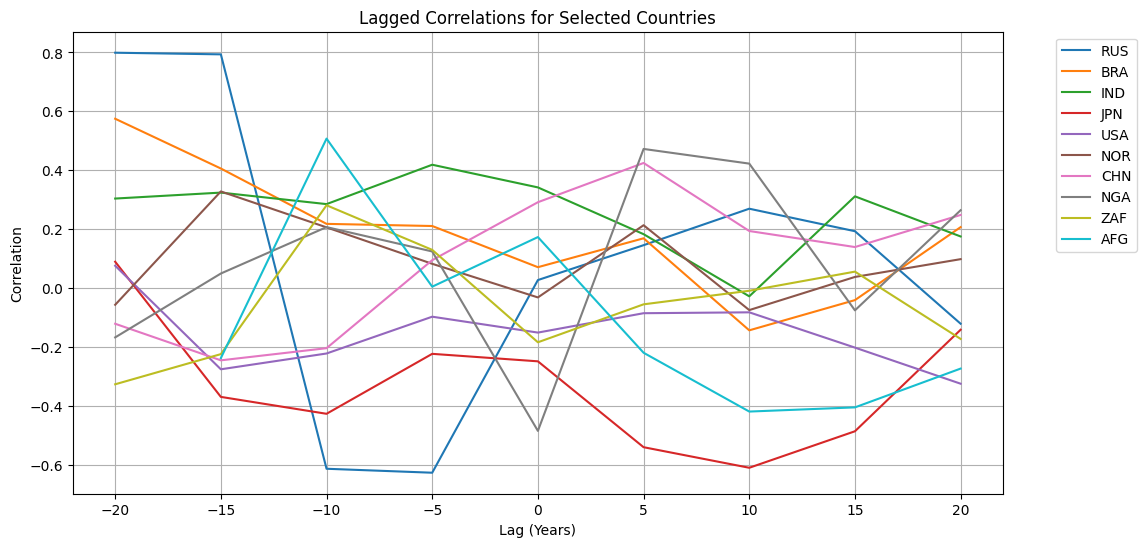

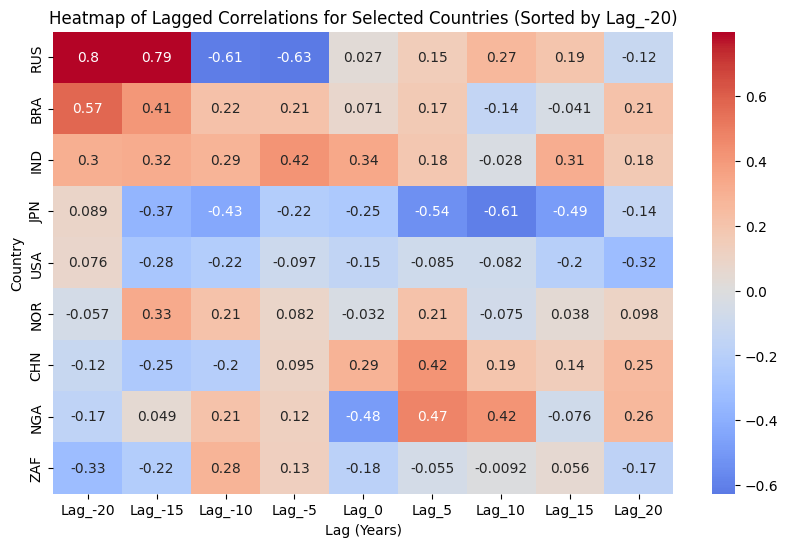

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'countries_interesting' is already defined

# Filter the dataframe to include only the countries in 'countries_interesting'
filtered_df = df_results[df_results['Country'].isin(countries_interesting)]

# Sort the dataframe by the correlation of 'Lag_15'
filtered_df_sorted = filtered_df.sort_values(by='Lag_-20', ascending=False)

# 1. Line plot for filtered countries
plt.figure(figsize=(12, 6))
for i, row in filtered_df_sorted.iterrows():
    plt.plot(lags, row[1:], label=row['Country'])

plt.title('Lagged Correlations for Selected Countries')
plt.xlabel('Lag (Years)')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Put the legend outside the plot
plt.show()

# 2. Heatmap for filtered countries, sorted by 'Lag_15'
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_df_sorted.set_index('Country').dropna(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Lagged Correlations for Selected Countries (Sorted by Lag_-20)')
plt.xlabel('Lag (Years)')
plt.ylabel('Country')
plt.show()


In [ ]:
merged_data

# Look at countries with high GDP growth past 10 years and those with lowets growth the past 10 years. Look at those countries education numbers lagged X years. What can we infer from that.


In [ ]:
merged_data

In [ ]:

# Define the range for the past 10 years
latest_year = merged_data['Year'].max()
last_10_years = latest_year - 10

# Step 1: Filter data to include only the past 10 years
last_10_years_data = merged_data[merged_data['Year'] > last_10_years]

# Step 2: Calculate the average GDP growth for each country over the last 10 years
average_gdp_growth = last_10_years_data.groupby('Country Code')['GDP'].mean().reset_index()

# Step 3: Sort the countries by average GDP growth in descending order
top_gdp_growth_countries = average_gdp_growth.sort_values(by='GDP', ascending=False)

# Display the countries with the highest average GDP growth
top_gdp_growth_countries



,Country Code,GDP
94,GUY,17.965353
132,LBY,10.389995
111,IRL,8.612574
72,ETH,7.834823
234,TJK,7.181930
...,...,...
84,GIB,NaN
110,INX,NaN
137,LIE,NaN
193,PRK,NaN


In [ ]:
top_gdp_growth_countries[top_gdp_growth_countries["Country Code"] == "USA"]

,Country Code,GDP
251,USA,2.324492


# Case study for selected countries

## tools

In [ ]:
# a tool that find full indicator name(in the table) with part of name

search_term = 'Years'

l = [indicator for indicator in indicator_names_unique if search_term.lower() in indicator.lower()]
print(len(l), l[:10])

24 ['Compulsory education, duration (years)', 'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)', 'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)', 'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)', 'Life expectancy at birth, female (years)', 'Life expectancy at birth, male (years)', 'Life expectancy at birth, total (years)', 'Lower secondary school starting age (years)', 'Number of deaths ages 10-14 years', 'Number of deaths ages 15-19 years']


In [ ]:
# a tool that find full country name(in the table) with part of name

search_term = 'tp'

l = [print(country) for country in countries_unique if search_term.lower() in country.lower()]

## visualize single indicator

In [ ]:
# case study plots

import plotly.graph_objects as go

# Select countries of interest
countries_of_interest = ['Korea, Rep.','Niger']
indicator_names = ['School enrollment, tertiary (% gross)', 'GDP per capita (current US$)']

for indicator_name in indicator_names:
    # Filter the dataframe for those countries
    indicator_df_filtered = indicator_dict[indicator_name]
    indicator_df_filtered = indicator_df_filtered[indicator_df_filtered['Country Name'].isin(countries_of_interest)]

    # Set 'Country Name' as index and filter out necessary columns (years)
    indicator_df_filtered.set_index('Country Name', inplace=True)
    years = [str(year) for year in range(1960, 2024)]  # Modify this range as needed
    indicator_df_filtered_years = indicator_df_filtered[years]

    # Create the plot using Plotly
    fig = go.Figure()

    for country in countries_of_interest:
        fig.add_trace(go.Scatter(
            x=years,
            y=indicator_df_filtered_years.loc[country],
            mode='lines+markers',
            name=country
        ))

    # Update layout
    fig.update_layout(
        title=f'{indicator_name}',
        xaxis_title='Year',
        yaxis_title=f'{indicator_name}',
        legend_title='Country',
        template='plotly_white',
        hovermode='x unified'
    )

    # Show the plot
    fig.show()

In [ ]:
import plotly.graph_objects as go

# Select countries of interest
countries_of_interest = ['Korea, Rep.','Niger']
indicator_name = 'Life expectancy at birth, total (years)'

# Filter the dataframe for those countries
indicator_df_filtered = indicator_dict[indicator_name]
indicator_df_filtered = indicator_df_filtered[indicator_df_filtered['Country Name'].isin(countries_of_interest)]

# Set 'Country Name' as index and filter out necessary columns (years)
indicator_df_filtered.set_index('Country Name', inplace=True)
years = [str(year) for year in range(1960, 2024)]  # Modify this range as needed
indicator_df_filtered_years = indicator_df_filtered[years]

# Create the plot using Plotly
fig = go.Figure()

for country in countries_of_interest:
    fig.add_trace(go.Scatter(
        x=years,
        y=indicator_df_filtered_years.loc[country],
        mode='lines+markers',
        name=country
    ))

# Update layout
fig.update_layout(
    title=f'{indicator_name}',
    xaxis_title='Year',
    yaxis_title=f'{indicator_name}',
    legend_title='Country',
    template='plotly_white',
    hovermode='x unified'
)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go

countries_of_interest = ['Korea, Rep.', 'Niger']
# indicators related to education
# lack of data: 'Literacy rate, youth total (% of people ages 15-24)', 'Literacy rate, adult total (% of people ages 15 and above)', 'Compulsory education, duration (years)', 'Trained teachers in preprimary education (% of total teachers)', 'Persistence to last grade of primary, total (% of cohort)', 'Current education expenditure, total (% of total expenditure in public institutions)', 'Government expenditure on education, total (% of GDP)', 'Government expenditure on education, total (% of GDP)'
education_indicator_names = ['Primary completion rate, total (% of relevant age group)', 'Primary education, teachers', 'Children out of school (% of primary school age)', 'School enrollment, secondary (% gross)', 'School enrollment, tertiary (% gross)']

fig = go.Figure()
for indicator_name in education_indicator_names:
    indicator_df_filtered = indicator_dict[indicator_name]
    indicator_df_filtered = indicator_df_filtered[indicator_df_filtered['Country Name'].isin(countries_of_interest)]

    indicator_df_filtered.set_index('Country Name', inplace=True)
    years = [str(year) for year in range(1980, 2020)]
    indicator_df_filtered_years = indicator_df_filtered[years]

    fig = go.Figure()

    for country in countries_of_interest:
        fig.add_trace(go.Scatter(
            x=years,
            y=indicator_df_filtered_years.loc[country],
            mode='lines+markers',
            name=country
        ))

    fig.update_layout(
        title=f'{indicator_name}',
        xaxis_title='Year',
        yaxis_title=f'{indicator_name}',
        legend_title='Country',
        template='plotly_white',
        hovermode='x unified'
    )

    fig.show()


In [ ]:
# indicators related to tech/research
import plotly.graph_objects as go

countries_of_interest = ['Korea, Rep.', 'Niger']
tech_indicator_names = ['Scientific and technical journal articles', 'Researchers in R&D (per million people)', 'Technicians in R&D (per million people)']

fig = go.Figure()
for indicator_name in tech_indicator_names:
    indicator_df_filtered = indicator_dict[indicator_name]
    indicator_df_filtered = indicator_df_filtered[indicator_df_filtered['Country Name'].isin(countries_of_interest)]

    indicator_df_filtered.set_index('Country Name', inplace=True)
    years = [str(year) for year in range(1970, 2024)]
    indicator_df_filtered_years = indicator_df_filtered[years]

    fig = go.Figure()

    for country in countries_of_interest:
        fig.add_trace(go.Scatter(
            x=years,
            y=indicator_df_filtered_years.loc[country],
            mode='lines+markers',
            name=country
        ))

    fig.update_layout(
        title=f'{indicator_name}',
        xaxis_title='Year',
        yaxis_title=f'{indicator_name}',
        legend_title='Country',
        template='plotly_white',
        hovermode='x unified'
    )

    fig.show()

In [ ]:
import plotly.graph_objects as go


countries_of_interest = ['Korea, Rep.', 'Niger']
gdp_indicator_names = ['GDP growth (annual %)', 'GDP per capita (current US$)', 'GDP per capita growth (annual %)']

fig = go.Figure()
for indicator_name in gdp_indicator_names:
    indicator_df_filtered = indicator_dict[indicator_name]
    indicator_df_filtered = indicator_df_filtered[indicator_df_filtered['Country Name'].isin(countries_of_interest)]

    indicator_df_filtered.set_index('Country Name', inplace=True)
    years = [str(year) for year in range(1970, 2024)]
    indicator_df_filtered_years = indicator_df_filtered[years]

    fig = go.Figure()

    for country in countries_of_interest:
        fig.add_trace(go.Scatter(
            x=years,
            y=indicator_df_filtered_years.loc[country],
            mode='lines+markers',
            name=country
        ))

    fig.update_layout(
        title=f'{indicator_name}',
        xaxis_title='Year',
        yaxis_title=f'{indicator_name}',
        legend_title='Country',
        template='plotly_white',
        hovermode='x unified'
    )

    fig.show()

Our intuition is that education will boost the economy because well-educated people can better contribute to a country's development. To check our intuition, we started with a case study, comparing South Korea with Niger in the same time period. Both countries started from relatively low levels of economic development in the early 1970s. In this case study on "The Power of Education Investment," we observe a compelling link between education and economic growth. Between 1971 and 1983, South Korea's secondary school enrollment rate rose dramatically from around 40% to over 80%, while Niger's remained consistently below 5%. This increase in enrollment rate corresponded with South Korea's significant rise in GDP per capita, which soared from under 1,000 USD in 1971 to above 7,000 USD by 1991. In contrast, Niger's stagnant enrollment rate growth correlated with minimal economic growth. This comparison underscores the transformative power of education investment: countries that prioritize education tend to see marked economic improvements as seen in South Korea’s journey from a developing nation to an economic powerhouse. Conversely, the lack of educational opportunities, as in Niger, hinders a nation's ability to achieve sustainable economic growth.

# correlation analysis

## yuwei’s work


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
<ipython-input-16-26fbeba5a063>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lags, y=p_vals, palette="Blues_d")


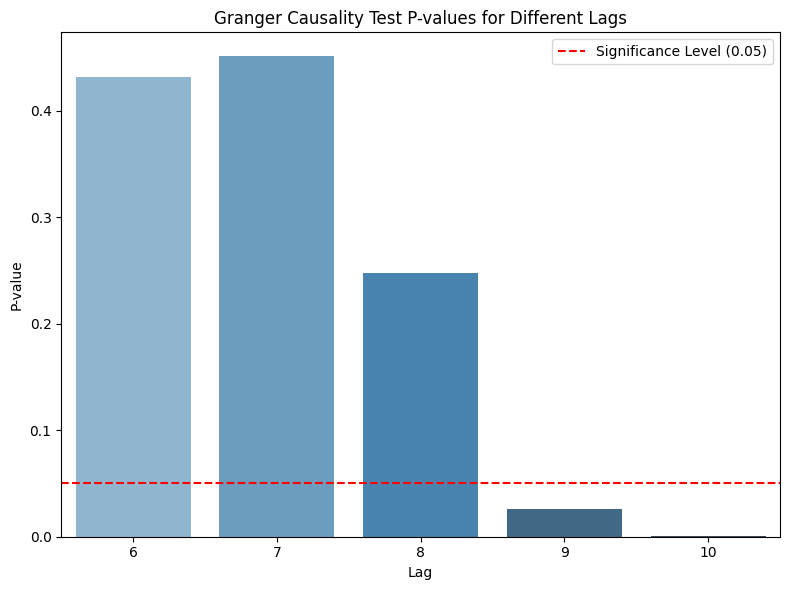

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target country and indicators
country_name = "Korea, Rep."
gdp_indicator_name = "GDP per capita (current US$)"
education_indicator_name = "School enrollment, tertiary (% gross)"

# Select the desired years for analysis
years = [str(year) for year in range(1985, 2024)]

# Extract GDP and education data for the country
gdp_df = indicator_dict.get(gdp_indicator_name)
education_df = indicator_dict.get(education_indicator_name)

# Filter the data for the selected country and years
gdp_data = gdp_df[gdp_df["Country Name"] == country_name][years].T.dropna()
education_data = education_df[education_df["Country Name"] == country_name][years].T.dropna()

# Ensure both time series have the same index and length
gdp_data.columns = ["GDP"]
education_data.columns = ["Education"]
combined_data = pd.concat([education_data, gdp_data], axis=1).dropna()

# Apply Granger causality test
granger_test_result = grangercausalitytests(combined_data, maxlag=10, verbose=False)

# Extract p-values from the Granger test results for each lag
p_values = {
    6: granger_test_result[6][0]['ssr_chi2test'][1],
    7: granger_test_result[7][0]['ssr_chi2test'][1],
    8: granger_test_result[8][0]['ssr_chi2test'][1],
    9: granger_test_result[9][0]['ssr_chi2test'][1],
    10: granger_test_result[10][0]['ssr_chi2test'][1]
}

# Plot the p-values for each lag
lags = list(p_values.keys())
p_vals = list(p_values.values())

plt.figure(figsize=(8, 6))
sns.barplot(x=lags, y=p_vals, palette="Blues_d")
plt.axhline(0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('Granger Causality Test P-values for Different Lags')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.tight_layout()
plt.show()


## junjie's work

Correlation Results:
Korea, Rep. - Primary completion rate, total (% of relevant age group): 0.16313798844901015
Niger - Primary completion rate, total (% of relevant age group): 0.9507125050125065
Korea, Rep. - Primary education, teachers: 0.9100904356739229
Niger - Primary education, teachers: 0.96585106147039
Korea, Rep. - Children out of school (% of primary school age): -0.6359864527648296
Niger - Children out of school (% of primary school age): -0.9178236131586324
Korea, Rep. - School enrollment, secondary (% gross): -0.3411270678034955
Niger - School enrollment, secondary (% gross): 0.9284134250350644
Korea, Rep. - School enrollment, tertiary (% gross): 0.884695986427367
Niger - School enrollment, tertiary (% gross): 0.8251137667071228


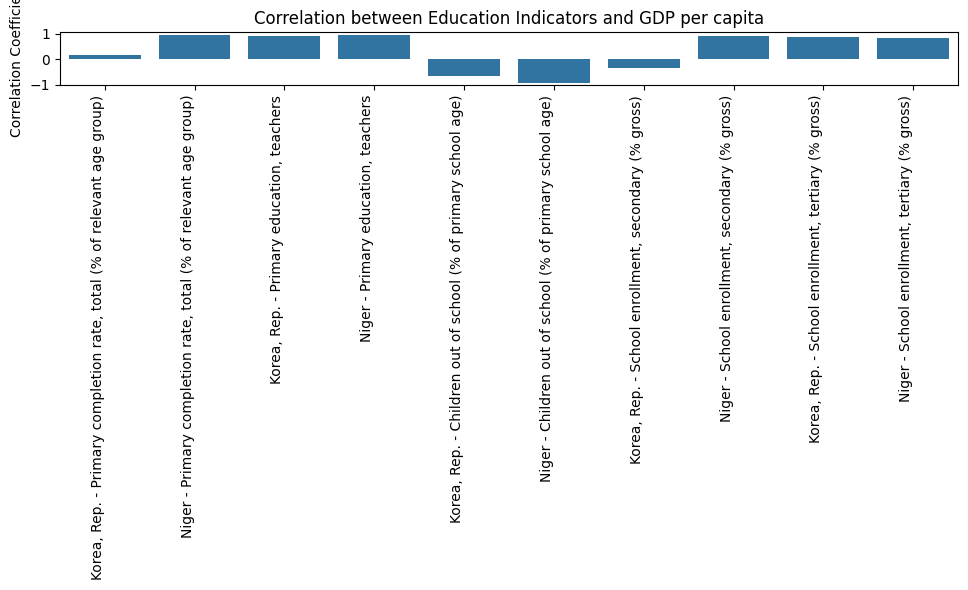

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# No lagging

# Define the countries of interest and the years for analysis
countries_of_interest = ['Korea, Rep.', 'Niger']
gdp_indicator_name = 'GDP per capita (current US$)'
gdp_years = [str(year) for year in range(1999, 2010)]
education_indicator_names = [
    'Primary completion rate, total (% of relevant age group)',
    'Primary education, teachers',
    'Children out of school (% of primary school age)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)'
]

# Extract the GDP per capita data
gdp_df = indicator_dict.get(gdp_indicator_name)

# Filter for countries of interest and set index
gdp_df_filtered = gdp_df[gdp_df['Country Name'].isin(countries_of_interest)]
gdp_df_filtered.set_index('Country Name', inplace=True)
gdp_df_filtered_years = gdp_df_filtered[gdp_years]

# Prepare to store correlation results
correlation_results = {}

# Iterate through each education indicator and calculate correlation with GDP
for indicator_name in education_indicator_names:
    # Get the education data for the current indicator
    education_df = indicator_dict.get(indicator_name)
    if education_df is not None:
        education_df = education_df[education_df['Country Name'].isin(countries_of_interest)]
        education_df.set_index('Country Name', inplace=True)
        education_df_years = education_df[gdp_years]

        # Combine the data for correlation analysis by transposing and joining
        combined = education_df_years.T.join(gdp_df_filtered_years.T, lsuffix='_edu', rsuffix='_gdp').dropna()

        # Calculate correlation for Korea, Rep.
        korea_data = combined[['Korea, Rep._edu', 'Korea, Rep._gdp']].dropna()
        korea_corr = korea_data.corr().iloc[0, 1]  # Extract the correlation coefficient between the two columns
        correlation_results[f"Korea, Rep. - {indicator_name}"] = korea_corr

        # Calculate correlation for Niger
        niger_data = combined[['Niger_edu', 'Niger_gdp']].dropna()
        niger_corr = niger_data.corr().iloc[0, 1]  # Extract the correlation coefficient between the two columns
        correlation_results[f"Niger - {indicator_name}"] = niger_corr

# Print the correlation results for each indicator and each country
print("Correlation Results:")
for indicator, corr_value in correlation_results.items():
    print(f"{indicator}: {corr_value}")

# Optionally, you can visualize the results using a bar plot for better readability
plt.figure(figsize=(10, 6))
sns.barplot(x=list(correlation_results.keys()), y=list(correlation_results.values()))
plt.xticks(rotation=90, ha='right')
plt.title('Correlation between Education Indicators and GDP per capita')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


Yearly Lagged Correlation Results (Education vs. 20-Year-Later GDP):
Korea, Rep. - Primary completion rate, total (% of relevant age group): 0.8634312606277833
Niger - Primary completion rate, total (% of relevant age group): 0.9350927502388903
Korea, Rep. - Primary education, teachers: 0.8558473084852438
Niger - Primary education, teachers: 0.9763508317961682
Korea, Rep. - Children out of school, primary: -0.7109618845933064
Niger - Children out of school, primary: nan
Korea, Rep. - Children out of school (% of primary school age): -0.6990502136549304
Niger - Children out of school (% of primary school age): nan
Korea, Rep. - School enrollment, secondary (% gross): 0.7981898297805793
Niger - School enrollment, secondary (% gross): 0.7968676772177451
Korea, Rep. - School enrollment, tertiary (% gross): 0.9592398112043858
Niger - School enrollment, tertiary (% gross): 0.9597007815850055


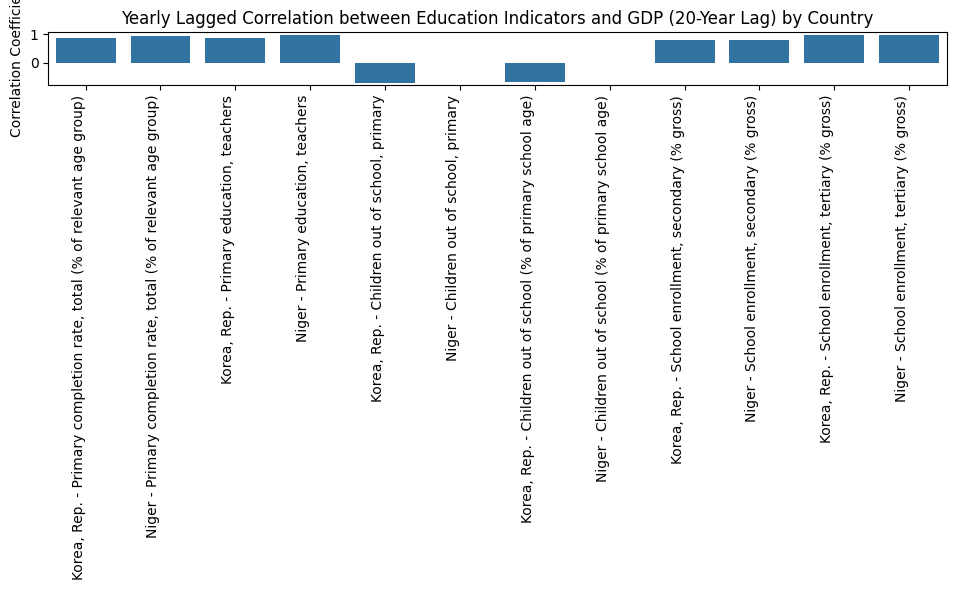

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# lagging 20 years

education_years = [str(year) for year in range(1980, 1986)]  # 1980-1985
gdp_years = [str(year) for year in range(2000, 2006)]  # 2000-2005

# Prepare to store yearly lagged correlation results
yearly_lagged_correlation_results = {}

# Iterate through each education indicator and calculate correlation for each year
for indicator_name in education_indicator_names:
    # Get the education data for the current indicator
    education_df = indicator_dict.get(indicator_name)
    if education_df is not None:
        education_df = education_df[education_df['Country Name'].isin(countries_of_interest)]
        education_df.set_index('Country Name', inplace=True)

        # Iterate through each year to calculate correlation for each country
        for i, education_year in enumerate(education_years):
            gdp_year = gdp_years[i]  # Map the corresponding GDP year 20 years later

            # Prepare to store correlation results for the current year
            for country in countries_of_interest:
                # Extract the education and GDP values for the given years
                education_value = education_df.loc[country, education_year]
                gdp_value = gdp_df_filtered.loc[country, gdp_year]

                # Store the values for later correlation calculation
                yearly_lagged_correlation_results.setdefault(indicator_name, {}).setdefault(country, []).append(
                    (education_value, gdp_value)
                )

# Calculate and print the correlation for each indicator and each country
final_results = {}
for indicator, country_data in yearly_lagged_correlation_results.items():
    for country, values in country_data.items():
        # Convert the list of tuples into a DataFrame
        df = pd.DataFrame(values, columns=['Education', 'GDP'])
        correlation = df.corr().iloc[0, 1]  # Calculate the correlation coefficient
        final_results[f"{country} - {indicator}"] = correlation

# Print the final lagged correlation results
print("Yearly Lagged Correlation Results (Education vs. 20-Year-Later GDP):")
for indicator, corr_value in final_results.items():
    print(f"{indicator}: {corr_value}")

# Optionally, visualize the results using a bar plot for better readability
plt.figure(figsize=(10, 6))
sns.barplot(x=list(final_results.keys()), y=list(final_results.values()))
plt.xticks(rotation=90, ha='right')
plt.title('Yearly Lagged Correlation between Education Indicators and GDP (20-Year Lag) by Country')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


## ziheng's work

### correlation

In [ ]:
# List of indicators for education-related expenditures
# x_indicator_names = [
#     'School enrollment, tertiary (% gross)',
#     'Access to electricity (% of population)',
#     'Control of Corruption: Estimate',
#     'Inflation, consumer prices (annual %)'
# ]

x_indicator_names = [
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Government expenditure on education, total (% of GDP)',
    'Pupil-teacher ratio, primary',
    'Pupil-teacher ratio, secondary',
    'Pupil-teacher ratio, tertiary',

]
y_indicator_name = 'GDP per capita (current US$)'

# Assuming df1 is the GDP per capita dataframe
df1 = indicator_dict[y_indicator_name]

# First, melt the GDP per capita dataframe (df1)
df1_melted = df1.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      var_name='Year', value_name=y_indicator_name)
df1_melted = df1_melted[['Country Name', 'Year', y_indicator_name]]
df1_melted['Year'] = df1_melted['Year'].astype(int)

# Initialize the combined dataframe as df1_melted
combined_df = df1_melted.copy()

# Now loop through each education expenditure indicator
for x_indicator_name in x_indicator_names:
    # Melt the dataframe for each indicator
    df2 = indicator_dict[x_indicator_name]
    df2_melted = df2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                          var_name='Year', value_name=x_indicator_name)
    df2_melted = df2_melted[['Country Name', 'Year', x_indicator_name]]
    df2_melted['Year'] = df2_melted['Year'].astype(int)

    # Merge with the existing combined dataframe
    combined_df = pd.merge(combined_df, df2_melted, on=['Country Name', 'Year'], how='inner')

# Drop rows with missing values after merging all indicators
cleaned_combined_df = combined_df.dropna()

# Display the cleaned combined dataframe
cleaned_combined_df


,Country Name,Year,GDP per capita (current US$),"School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Government expenditure on education, total (% of GDP)","Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary","Pupil-teacher ratio, tertiary"
2250,Guatemala,1970,349.024976,57.326519,10.188090,3.174810,1.85872,35.97176,13.79024,11.87900
2321,Panama,1970,891.054671,100.913918,38.263031,6.429940,4.04328,27.06892,20.73626,19.97098
2323,Paraguay,1970,246.850847,102.615097,17.051661,3.897630,2.10519,32.29380,9.39323,8.54812
2398,Austria,1971,2380.978458,102.737961,87.529846,11.672810,4.28235,21.43599,19.57274,8.56418
2432,"Congo, Rep.",1971,223.675316,103.811432,15.917710,1.458700,5.55095,61.85249,33.04436,15.28205
...,...,...,...,...,...,...,...,...,...,...
12755,Seychelles,2018,18440.234046,96.983032,77.359467,14.309380,4.03900,14.48826,10.77890,17.54688
12766,Sri Lanka,2018,4360.584735,97.279602,96.131882,18.672001,1.98781,21.73735,17.52875,29.76096
12768,St. Lucia,2018,11585.691871,97.921158,89.198181,14.697770,3.33578,14.73909,11.14556,7.71379
12789,Ukraine,2018,3096.562500,88.572884,85.833191,81.494667,5.31992,12.98011,7.33711,10.32792


In [ ]:
# Include GDP per capita and all education-related indicators for correlation calculation
columns_for_corr = [y_indicator_name] + x_indicator_names

# Calculate the correlation matrix for GDP per capita and all education-related indicators
correlation = cleaned_combined_df[columns_for_corr].corr(method='pearson')

# Display the correlation matrix
correlation


,GDP per capita (current US$),"School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Government expenditure on education, total (% of GDP)","Pupil-teacher ratio, primary","Pupil-teacher ratio, secondary","Pupil-teacher ratio, tertiary"
GDP per capita (current US$),1.000000,0.037866,0.519256,0.476210,0.111651,-0.484980,-0.405950,-0.139494
"School enrollment, primary (% gross)",0.037866,1.000000,0.276484,0.110655,0.075898,-0.125208,-0.031662,0.027536
"School enrollment, secondary (% gross)",0.519256,0.276484,1.000000,0.756384,0.283296,-0.779084,-0.588442,-0.073147
"School enrollment, tertiary (% gross)",0.476210,0.110655,0.756384,1.000000,0.274510,-0.615705,-0.508747,0.068465
"Government expenditure on education, total (% of GDP)",0.111651,0.075898,0.283296,0.274510,1.000000,-0.249147,-0.202695,-0.113445
"Pupil-teacher ratio, primary",-0.484980,-0.125208,-0.779084,-0.615705,-0.249147,1.000000,0.810267,0.216889
"Pupil-teacher ratio, secondary",-0.405950,-0.031662,-0.588442,-0.508747,-0.202695,0.810267,1.000000,0.296114
"Pupil-teacher ratio, tertiary",-0.139494,0.027536,-0.073147,0.068465,-0.113445,0.216889,0.296114,1.000000


### regression and p-value

In [ ]:
import statsmodels.api as sm

# Define the dependent variable (GDP per capita)
y = cleaned_combined_df[y_indicator_name]

# Define the independent variables (the list of education-related indicators)
X = cleaned_combined_df[x_indicator_names]

# Add a constant term to the independent variables to account for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary, which includes coefficients, p-values, R-squared, etc.
print(results.summary())


                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.319
Model:                                      OLS   Adj. R-squared:                  0.316
Method:                           Least Squares   F-statistic:                     92.71
Date:                          Thu, 24 Oct 2024   Prob (F-statistic):          6.29e-111
Time:                                  02:54:09   Log-Likelihood:                -15308.
No. Observations:                          1391   AIC:                         3.063e+04
Df Residuals:                              1383   BIC:                         3.067e+04
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025 

R-squared (0.607): This indicates that about 60.7% of the variability in GDP per capita is explained by the independent variables (the indicators you used). This is a reasonably good fit, although it’s not perfect.
Adjusted R-squared (0.606): This value is slightly lower, which is expected when more predictors are added to the model. It still suggests a good fit.
F-statistic (1056) and Prob (F-statistic: 0.00): The model as a whole is statistically significant, as indicated by the extremely low p-value (0.00). This means the predictors collectively provide a good explanation for the variance in GDP per capita.

School enrollment, tertiary and Control of Corruption are statistically significant predictors of GDP per capita (p-values < 0.05).

### Explainable Boosting Machine (EBM)

In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 16.0 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=401

In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.model_selection import train_test_split
from interpret import show

# Define the dependent variable (GDP per capita) and independent variables
X = cleaned_combined_df[x_indicator_names]  # The independent variables
y = cleaned_combined_df[y_indicator_name]   # The dependent variable (GDP per capita)

# Split the data into training and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the EBM regressor
ebm = ExplainableBoostingRegressor()

# Fit the model on the training data
ebm.fit(X_train, y_train)

# Evaluate the model (R-squared score)
r2_train = ebm.score(X_train, y_train)
r2_test = ebm.score(X_test, y_test)

# Print the model's R-squared on both train and test sets
print(f"R-squared on training set: {r2_train}")
print(f"R-squared on test set: {r2_test}")

# Global explanation: View the overall feature importance and effects
ebm_global = ebm.explain_global()
show(ebm_global)

# Local explanation for individual predictions: View for test data points
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)


R-squared on training set: 0.7928165916923509
R-squared on test set: 0.7406969235013605
